# The Final Tutorial : What Makes a Good Headline?
### The results will shock you!


Code used to gather data: 

    !pip install webhoseio
    import pandas as pd
    import webhoseio

    # put your own webhoseio api key in the my_api_key variable.
    # (run api_key.py is to prevent the key from being shown publicly on github)
    # There will be a error, but it won't affect anything.

    my_api_key = ""
    %run api_key.py

    # Try to avoid re-running this one alot we have 1000 queries max.

    webhoseio.config(token=my_api_key)
    query_params = {
        "q": "language:english site_type:news social.facebook.likes:>500",
        "ts": "1542059049078",
        "sort": "social.facebook.likes"
        }
        
    output = webhoseio.query("filterWebContent", query_params)
    
    
    i = 0
    t = 838
    data_persons = [] 
    data_organizations = []
    data_locations = []
    data_notags = []
    for x_r in range(t):

        for post in output['posts']:
            d_base = {
                    'title' : post['thread']['title'],
                    'fb_likes' : post['thread']['social']['facebook']['likes'],
                    'fb_comments' : post['thread']['social']['facebook']['comments'],
                    'fb_shares' : post['thread']['social']['facebook']['shares'],
                    'spam_score' : post['thread']['spam_score'],
                    'performance_score' : post['thread']["performance_score"],
                    'domain_rank' : post['thread']['domain_rank'],
                    'site' : post['thread']['site'],
                    'uuid' : post['thread']['uuid']
                }
            data_notags.append(d_base)
            for person in post['entities']['persons']:
                d_p = d_base.copy()
                d_p['tag'] = person['name']
                d_p['sentiment'] = person['sentiment']
                data_persons.append(d_p)
            for organization in post['entities']['organizations']:
                d_o = d_base.copy()
                d_o['tag'] = organization['name']
                d_o['sentiment'] = organization['sentiment']
                data_organizations.append(d_o)
            for location in post['entities']['locations']:
                d_l = d_base.copy()
                d_l['tag'] = location['name']
                d_l['sentiment'] = organization['sentiment']
                data_locations.append(d_l)
        i = i+1
        print(str(i*100) + ' / 83850')
        output = webhoseio.get_next()


    df_persons = pd.DataFrame(data_persons)
    df_organizations = pd.DataFrame(data_organizations)
    df_locations = pd.DataFrame(data_locations)
    df_all = pd.DataFrame(data_persons+data_organizations+data_locations)
    df_notags = pd.DataFrame(data_notags)
    display(df_all)

Then we saved the data to CSVs for later use. 
We import these CSVs into dataframes.

    df_dict = {"df_persons":df_persons,
               "df_organizations":df_organizations,
               "df_locations":df_locations,
               "df_all":df_all,
               "df_notags":df_notags}
    for k, v in df_dict.items():
        v.to_csv(k+".csv")

Let's import each CSV into a dataframe by essentially doing the reverse process.

In [1]:
import pandas as pd
df_persons = pd.read_csv("df_persons"+".csv").drop(['Unnamed: 0'], axis=1)
df_organizations = pd.read_csv("df_organizations"+".csv").drop(['Unnamed: 0'], axis=1)
df_locations = pd.read_csv("df_locations"+".csv").drop(['Unnamed: 0'], axis=1)
df_all = pd.read_csv("df_all"+".csv").drop(['Unnamed: 0'], axis=1)
df_notags = pd.read_csv("df_notags"+".csv").drop(['Unnamed: 0'], axis=1)


# display(df_all)

,domain_rank,fb_comments,fb_likes,fb_shares,performance_score,sentiment,site,spam_score,tag,title,uuid
0,3307.0,51145,297156,19368,10,negative,newsweek.com,0.672,alexandria ocasio-cortez,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278
1,3307.0,51145,297156,19368,10,none,newsweek.com,0.672,david martosko,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278
2,3307.0,51145,297156,19368,10,none,newsweek.com,0.672,martosko,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278
3,3307.0,51145,297156,19368,10,none,newsweek.com,0.672,ocasio-cortez,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278
4,3307.0,51145,297156,19368,10,none,newsweek.com,0.672,christopher columbus,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278
5,139.0,147614,249425,36600,10,negative,huffingtonpost.com,0.000,trump,Every President Recited This Prayer Except Tru...,d13abf959e176105e8be4a8715f4e74434eb2cfc
6,139.0,147614,249425,36600,10,none,huffingtonpost.com,0.000,michael b. jordan,Every President Recited This Prayer Except Tru...,d13abf959e176105e8be4a8715f4e74434eb2cfc
7,139.0,147614,249425,36600,10,none,huffingtonpost.com,0.000,donald trump,Every President Recited This Prayer Except Tru...,d13abf959e176105e8be4a8715f4e74434eb2cfc
8,139.0,147614,249425,36600,10,none,huffingtonpost.com,0.000,george h. w. bush,Every President Recited This Prayer Except Tru...,d13abf959e176105e8be4a8715f4e74434eb2cfc
9,139.0,147614,249425,36600,10,none,huffingtonpost.com,0.000,stallone,Every President Recited This Prayer Except Tru...,d13abf959e176105e8be4a8715f4e74434eb2cfc


In [2]:
# naive approach - each tag is independent
import seaborn as sns
# sns.boxplot(x="tag", y="performance_score", data = df_all.sample(n=500))


In [4]:
# trying slightly different method because of strange sampling results
df_sample = df_all.copy()
df_sample = df_sample.groupby(['uuid']).count()
df_all_uuids = df_sample.index.to_series()
df_all_uuids_1000 = df_all_uuids.tolist()[:5000]
# display(df_all_uuids_1000_series)

In [3]:
sample_df = pd.DataFrame(columns = list(df_all))
for uuid in df_all_uuids_1000:
    new_df = df_all[df_all['uuid'] == uuid]
    if not new_df.dropna().empty:
        sample_df = pd.concat([sample_df, new_df])
# display(sample_df)

,domain_rank,fb_comments,fb_likes,fb_shares,performance_score,sentiment,site,spam_score,tag,title,uuid
59623,1455.0,3242,3917,302,3,none,abc.net.au,0.0,valery,US agents shoot tear gas at migrants attemptin...,000060d7623243db32e636522622b4278dce6276
59624,1455.0,3242,3917,302,3,none,abc.net.au,0.0,ana zuniga,US agents shoot tear gas at migrants attemptin...,000060d7623243db32e636522622b4278dce6276
319677,1455.0,3242,3917,302,3,none,abc.net.au,0.0,ap,US agents shoot tear gas at migrants attemptin...,000060d7623243db32e636522622b4278dce6276
319678,1455.0,3242,3917,302,3,none,abc.net.au,0.0,milenio tv,US agents shoot tear gas at migrants attemptin...,000060d7623243db32e636522622b4278dce6276
492762,1455.0,3242,3917,302,3,none,abc.net.au,0.0,us,US agents shoot tear gas at migrants attemptin...,000060d7623243db32e636522622b4278dce6276
492763,1455.0,3242,3917,302,3,none,abc.net.au,0.0,tijuana,US agents shoot tear gas at migrants attemptin...,000060d7623243db32e636522622b4278dce6276
492764,1455.0,3242,3917,302,3,none,abc.net.au,0.0,mexico,US agents shoot tear gas at migrants attemptin...,000060d7623243db32e636522622b4278dce6276
266958,13.0,416,555,365,3,negative,msn.com,0.0,stormy daniels,Stormy Daniels: Michael Avenatti Filed Defamat...,00006fd62d5b1481342efacda5444223b6e4e9bc
266959,13.0,416,555,365,3,negative,msn.com,0.0,daily bea,Stormy Daniels: Michael Avenatti Filed Defamat...,00006fd62d5b1481342efacda5444223b6e4e9bc
266960,13.0,416,555,365,3,negative,msn.com,0.0,michael avenatti,Stormy Daniels: Michael Avenatti Filed Defamat...,00006fd62d5b1481342efacda5444223b6e4e9bc


In [5]:
sm_df = sample_df.copy().set_index('uuid')
sm_df = sm_df[~sm_df.index.duplicated()]['performance_score']
# display(sm_df)

uuid
000060d7623243db32e636522622b4278dce6276     3
00006fd62d5b1481342efacda5444223b6e4e9bc     3
00007ebb0c78b6b6ed5660cee845bfdbe3b55934     0
0001a122fc2a03e9e2be51266d18267c5a4db767     2
000213ca51e05cd2877fa273ab2b0628d5d1013e    10
0002aa9745a194f89685b4c016940e32dadef490     0
0003be1736cfd35ca63f8cc34765e60e8f6456a9     6
0004e6fb9efcaa5ff90a3a1dea03586c0708d11a     0
0005a62cbd56eb42c64082f6eadd71e2616d73b9     2
00079a4335c255e8be68f0e0caa8cb043ec27a46     1
000885b79a0cc33982b8a21bb7696ba9dc110103    10
000899e4aa23c503919e319129c516dbbd4b784a     1
00099d72a259f4e7e9a4225cd377807c96c48fd5    10
0009e750700e458ba3e77f6e6193b38ff92253dc     1
000a9f1fa20160a6730b76b010ff0e682b8df685     2
000b30ae0e9db014891ec6eeeecf1a344f768e7c     1
000d58e15af27b71deb9e3f2b02e0707e713deae    10
000d5cf4d0a6019d3f5b67df6d0ff47d34734cfa     8
000dbb31eed10a2759877a7936cea3755c1de9be     4
000def87cdc0a2f60ae793e9878274814e961fb9     3
000e32de50342d818947a5e392597148859a8912     4
000e7bb6

In [6]:
# Clearly there's something to it, but there's also lots of variance here... 
# and assuming tags interact we probably need to do a Random Forest
# To get there, it's a good idea to start with converting each tag to a frequency table per uuid
# table = df_all.sample(n=8000).reset_index()
# table = sample_df.groupby(['uuid']).count()
# table = sample_df.dropna().set_index('uuid').drop_duplicates()
# table = table[~table.index.duplicated(keep='first')].reset_index()



# NEW VERSION!

table = sample_df


# display(table['uuid'])
# display(table)
freq_table = pd.crosstab(table['uuid'],table['tag'])

# display(freq_table)
# Import train_test_split function
from sklearn.model_selection import train_test_split

# freq_table_and_data = freq_table.join(df_notags.set_index('uuid'), on='uuid', how="inner")



X=freq_table  # Features
y=sm_df  # Labels
y=y.astype('int')
# display(freq_table_and_data)
# display(X)
# display(y)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


In [7]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=10)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

C:\Users\AlexE\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [8]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.31684491978609625


In [20]:
import matplotlib.pyplot as plt
import numpy as np
col = list(freq_table)
#modelname.feature_importance_
y_2 = clf.feature_importances_

top_10_feature_indexes = sorted(range(len(y_2)), key=lambda i: y_2[i], reverse=True)[:10]
for index in top_10_feature_indexes:
    print(col[index], y_2[index])


tanjug 0.008705433496935217
trump 0.005245956681892578
donald trump 0.002985857662829398
cnn 0.0029669740224087275
india 0.002863224013320546
uk 0.00282970589370247
u.s. 0.0024759728494087047
bbc news 0.0023241248402421913
brexit 0.002321952395120567
washington 0.0022970671926285454


In [ ]:
!pip install webhoseio

In [145]:
import warnings
warnings.filterwarnings('ignore') 
#often times, we'll see warnings as a sign of caution. For our purpose, we're going to ignore these and they don't affect our tutorial
#you can undo this if you want

Code used to gather data: 

    import pandas as pd
    import webhoseio

    # put your own webhoseio api key in the my_api_key variable.
    # (run api_key.py is to prevent the key from being shown publicly on github)
    # There will be a error, but it won't affect anything.

    my_api_key = ""
    %run api_key.py

    # Try to avoid re-running this one alot we have 1000 queries max.

    webhoseio.config(token=my_api_key)
    query_params = {
        "q": "language:english site_type:news social.facebook.likes:>500",
        "ts": "1542059049078",
        "sort": "social.facebook.likes"
        }
        
    output = webhoseio.query("filterWebContent", query_params)
    
    
    i = 0
    t = 838
    data_persons = [] 
    data_organizations = []
    data_locations = []
    data_notags = []
    for x_r in range(t):

        for post in output['posts']:
            d_base = {
                    'title' : post['thread']['title'],
                    'fb_likes' : post['thread']['social']['facebook']['likes'],
                    'fb_comments' : post['thread']['social']['facebook']['comments'],
                    'fb_shares' : post['thread']['social']['facebook']['shares'],
                    'spam_score' : post['thread']['spam_score'],
                    'performance_score' : post['thread']["performance_score"],
                    'domain_rank' : post['thread']['domain_rank'],
                    'site' : post['thread']['site'],
                    'uuid' : post['thread']['uuid']
                }
            data_notags.append(d_base)
            for person in post['entities']['persons']:
                d_p = d_base.copy()
                d_p['tag'] = person['name']
                d_p['sentiment'] = person['sentiment']
                data_persons.append(d_p)
            for organization in post['entities']['organizations']:
                d_o = d_base.copy()
                d_o['tag'] = organization['name']
                d_o['sentiment'] = organization['sentiment']
                data_organizations.append(d_o)
            for location in post['entities']['locations']:
                d_l = d_base.copy()
                d_l['tag'] = location['name']
                d_l['sentiment'] = organization['sentiment']
                data_locations.append(d_l)
        i = i+1
        print(str(i*100) + ' / 83850')
        output = webhoseio.get_next()


    df_persons = pd.DataFrame(data_persons)
    df_organizations = pd.DataFrame(data_organizations)
    df_locations = pd.DataFrame(data_locations)
    df_all = pd.DataFrame(data_persons+data_organizations+data_locations)
    df_notags = pd.DataFrame(data_notags)
    display(df_all)

Then we saved the data to CSVs for later use. 
We import these CSVs into dataframes.

    df_dict = {"df_persons":df_persons,
               "df_organizations":df_organizations,
               "df_locations":df_locations,
               "df_all":df_all,
               "df_notags":df_notags}
    for k, v in df_dict.items():
        v.to_csv(k+".csv")

Let's import each CSV into a dataframe by essentially doing the reverse process.

In [3]:
import pandas as pd 
#anything tagged with people
df_persons = pd.read_csv("df_persons"+".csv").drop(['Unnamed: 0'], axis=1)
#with organizations
df_organizations = pd.read_csv("df_organizations"+".csv").drop(['Unnamed: 0'], axis=1)
#with locations
df_locations = pd.read_csv("df_locations"+".csv").drop(['Unnamed: 0'], axis=1)

df_all = pd.read_csv("df_all"+".csv").drop(['Unnamed: 0'], axis=1)
df_notags = pd.read_csv("df_notags"+".csv").drop(['Unnamed: 0'], axis=1)

#each data point is an article and its tag. uuid is unique per article
display(df_all.head())

,domain_rank,fb_comments,fb_likes,fb_shares,performance_score,sentiment,site,spam_score,tag,title,uuid
0,3307.0,51145,297156,19368,10,negative,newsweek.com,0.672,alexandria ocasio-cortez,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278
1,3307.0,51145,297156,19368,10,none,newsweek.com,0.672,david martosko,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278
2,3307.0,51145,297156,19368,10,none,newsweek.com,0.672,martosko,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278
3,3307.0,51145,297156,19368,10,none,newsweek.com,0.672,ocasio-cortez,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278
4,3307.0,51145,297156,19368,10,none,newsweek.com,0.672,christopher columbus,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278


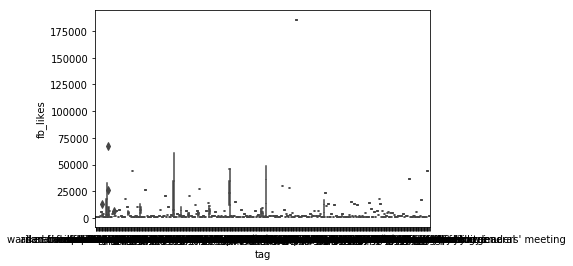

In [7]:
# naive approach - each tag is independent
import seaborn as sns
sns.boxplot(x="tag", y="fb_likes", data = df_all.sample(n=500))


In [9]:
# Clearly there's something to it, but there's also lots of variance here... 
# and assuming tags interact we probably need to do a Random Forest
# To get there, it's a good idea to start with converting each tag to a frequency table per uuid
display(df_all['uuid'])
display(df_)
freq_table = pd.crosstab(df_all['uuid'],df_all['tag'] )

# Import train_test_split function
from sklearn.model_selection import train_test_split

freq_table_and_data = freq_table.join(df_notags.set_index('uuid'), on='uuid')

X=freq_table  # Features
y=freq_table_and_data['fb_likes']  # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

ValueError: negative dimensions are not allowed

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [7]:
#number of articles with tags which we will be analyzing
len(df_all.groupby('uuid').groups.keys())

73772

In [28]:
#find the correlation between total sentiment and popularity 
#a lot of tags have biased sentiments
#each tag coresponds to a sentiment

#how are we going to calculate sentiment?
#we're going to calculate an overall sentiment
#for each group by uuid, which is the article and its tags, loop through to calculate an overall sentiments 
#+1 for positive, -1 for negative, and do nothing for none 

#put it in a new dataframe with uuid and sentiment metric
sentiments= pd.DataFrame(columns= [ 'sentiment']) 
sentiments['uuid']= df_all.groupby('uuid').groups.keys()

#add a new column to df_all copy df .copy for -1 1 0 sentiments 
#for groupby uid, do sum on sentiments

#calculate all of the stuff
i=0 #to add all the uuids
for name, group in df_all.groupby('uuid'):
    total=0 
    for k, j in group['sentiment']:
        if j=="negative":
            total= total-1 
        elif j=="positive":
            total= total+1 
    sentiments.loc[k, 'sentiment']= total
    i= i+1

In [ ]:
#all the articles with biased tags will be calculated.
#df_all is such a large set of tags, we're only going to 
#df_sent is just a sample from df_all with a new sentiment column that will be initialized

df_sent= df_all[df_all['sentiment']!="none"][df_all['sentiment']!="neutral"][:30000].copy()

In [117]:
df_sent.head()

,domain_rank,fb_comments,fb_likes,fb_shares,performance_score,sentiment,site,spam_score,tag,title,uuid,sent_metric
0,3307.0,51145,297156,19368,10,negative,newsweek.com,0.672,alexandria ocasio-cortez,Alexandria Ocasio-Cortez Wants to Replace Colu...,6110cf3b1a50615ebacd4189abd4c2b143c28278,-1
5,139.0,147614,249425,36600,10,negative,huffingtonpost.com,0.000,trump,Every President Recited This Prayer Except Tru...,d13abf959e176105e8be4a8715f4e74434eb2cfc,-1
13,584.0,14186,248173,24123,10,negative,cbsnews.com,0.544,jim mcgrath,George H.W. Bush's service dog Sully lays by h...,05b55724a62642ec481b527c7815cd8b6879e697,-1
14,584.0,14186,248173,24123,10,negative,cbsnews.com,0.544,george h.w. bush,George H.W. Bush's service dog Sully lays by h...,05b55724a62642ec481b527c7815cd8b6879e697,-1
25,81.0,94401,197419,19380,10,negative,cnn.com,0.000,trump,Trump: I'm thankful for the difference I've ma...,6bf05f1935bf304834b694db85704e09b448c537,-1


In [111]:
#initialize a new column for our metrics
df_sent['sent_metric']= 0 
#turn the sentiment metrics into numerical values in df_sent
for i, row in df_sent.iterrows():
    if row['sentiment']=="negative":
        df_sent.loc[i, 'sent_metric']= df_sent.loc[i, 'sent_metric'] - 1
    elif row['sentiment']=="positive":
        df_sent.loc[i, 'sent_metric']= df_sent.loc[i, 'sent_metric'] + 1


In [116]:
#create a new dataframe to store our statistics per article
df_art= pd.DataFrame()
df_art['uuid']= ""
df_art['total_sent']= 0
#use groupby to group by article, and then calculate the sum of sent_metric to get the total sent_metric of the article
c= 0 #use c to index consistently per article
for name, group in df_sent.groupby('uuid'):
    df_art.loc[c, 'uuid']= name 
    df_art.loc[c, 'total_sent']= group['sent_metric'].sum()
    c= c+1

In [118]:
#peep our total sentiments 
df_art.head()

,uuid,total_sent
0,000213ca51e05cd2877fa273ab2b0628d5d1013e,-1.0
1,000885b79a0cc33982b8a21bb7696ba9dc110103,-2.0
2,000899e4aa23c503919e319129c516dbbd4b784a,-1.0
3,00099d72a259f4e7e9a4225cd377807c96c48fd5,-3.0
4,000a9f1fa20160a6730b76b010ff0e682b8df685,-1.0


In [127]:
#match fb likes from the article to the sentiments 
df_art['fb_likes']= 0
df_art['fb_shares']= 0

#use a loop to go through each group like we did previously to keep the uuids consistent
c= 0 #use c to index consistently per article
for name, group in df_sent.groupby('uuid'):
    df_art.loc[c, 'fb_likes']= group.iloc[0]['fb_likes'] #each member in a group should have the same number of likes and shares
    df_art.loc[c, 'fb_shares']= group.iloc[0]['fb_shares']
    c= c+1

In [129]:
#add a new column to df_art that says if our total_sent is positive or negative
#this will aid us in graphing and creating a better analysis
df_art['sign_of_sent']= ""


for i, row in df_art.iterrows():
    if row['total_sent'] > 0:
        df_art.loc[i, 'sign_of_sent']= "positive"
    elif row['total_sent'] < 0:
        df_art.loc[i, 'sign_of_sent']= "negative"
    else: 
        df_art.loc[i, 'sign_of_sent']= "neutral"


In [130]:
#look at everything we've matched!
df_art.head()

,uuid,total_sent,fb_likes,fb_shares,sign_of_sent
0,000213ca51e05cd2877fa273ab2b0628d5d1013e,-1.0,1766,5780,negative
1,000885b79a0cc33982b8a21bb7696ba9dc110103,-2.0,19259,5123,negative
2,000899e4aa23c503919e319129c516dbbd4b784a,-1.0,2597,126,negative
3,00099d72a259f4e7e9a4225cd377807c96c48fd5,-3.0,9365,1748,negative
4,000a9f1fa20160a6730b76b010ff0e682b8df685,-1.0,2874,261,negative


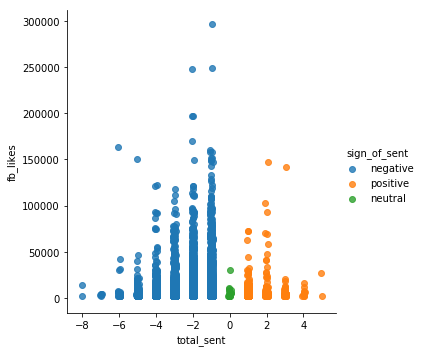

In [139]:
#now, we can graph a scatterplot showing our details
import seaborn as sns

#total_sent vs fb_likes
sns.lmplot(x= 'total_sent', y= 'fb_likes', data=df_art, hue= 'sign_of_sent', x_jitter= .07, fit_reg=False)


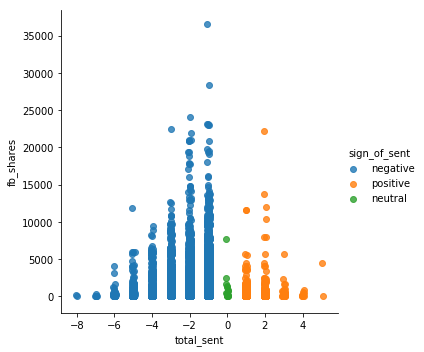

In [140]:
#total_sent vs fb_shares
sns.lmplot(x= 'total_sent', y= 'fb_shares', data=df_art, hue= 'sign_of_sent', x_jitter= .07, fit_reg=False)

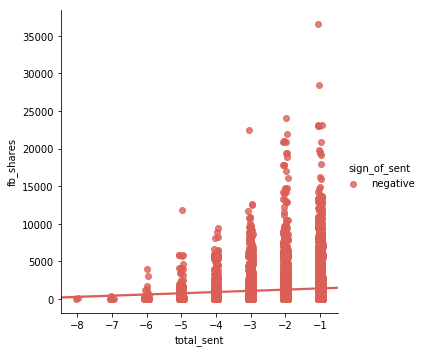

In [152]:
#we can also do seperate regressions for each type of sentiment 
sns.lmplot(x= 'total_sent', y= 'fb_shares', data=df_art[df_art['sign_of_sent']== "negative"], hue= 'sign_of_sent', x_jitter= .07, palette= sns.color_palette("hls", 3))

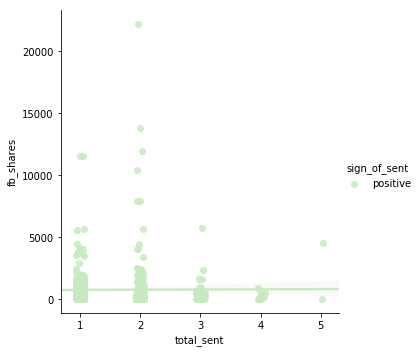

In [154]:
#analyze fb shares that are positive
sns.lmplot(x= 'total_sent', y= 'fb_shares', data=df_art[df_art['sign_of_sent']== "positive"], hue= 'sign_of_sent', x_jitter= .07, palette= sns.color_palette("Greens", 3))

In [156]:
df_sent[df_sent['tag']=="trump"].head()

,domain_rank,fb_comments,fb_likes,fb_shares,performance_score,sentiment,site,spam_score,tag,title,uuid,sent_metric
5,139.0,147614,249425,36600,10,negative,huffingtonpost.com,0.0,trump,Every President Recited This Prayer Except Tru...,d13abf959e176105e8be4a8715f4e74434eb2cfc,-1
25,81.0,94401,197419,19380,10,negative,cnn.com,0.0,trump,Trump: I'm thankful for the difference I've ma...,6bf05f1935bf304834b694db85704e09b448c537,-1
27,81.0,94073,197419,19380,10,negative,cnn.com,0.0,trump,Trump: I'm thankful for the difference I've ma...,6258e202b52da859edf569623b7a99b3ad0e7fc3,-1
160,185.0,12407,122155,6003,10,negative,foxnews.com,0.0,trump,Bush family wants funeral that avoids anti-Tru...,eb6dc2fd56f25d27733bd61fc3bdc528e15014ca,-1
169,185.0,12208,121583,5810,10,negative,foxnews.com,0.0,trump,Bush family wants funeral that avoids anti-Tru...,8b0b94c005a9612914a7904d8191fd813f4f7400,-1
